Finally I noticed something on the requirement of all lab assignments I have ignored from the very beginning: 

> You are **NOT** required to show all the codes or the raw output of statistical software. You only need to answer the questions.

I therefore turned `echo` for few code block to `false`. The long and annoying code must be interruptive while reading. 

# Dataset 1: Tea vs Cognitive function

## Context
In Laboratory 5 we analyzed `tea.sav`, which contains cognitive function scores of participants who consumed varying amounts of tea every day. Now we hope to study whether there is a difference in cognitive function scores between individuals who do not drink tea and those who drink two cups of tea per day.

## Objectives 
1. Do you think the independent-samples $t$-test is a good choice? Why or why not?
2. Conduct an independent-samples $t$-test. Write a short paragraph that summarizes and interprets the results of the test.

## Solutions

In [2]:
#| echo: false
import pandas as pd

download_df = pd.read_spss('./datasets/download.sav')
tea_df = pd.read_spss('./datasets/tea.sav')

### Q1: Why independent-samples $t$-test? 

Given: 

$X$: cups of tea  
$Y$: cognitive function scores

Group 1: not drink tea per day (`tea == 0`)  
Group 2: 2 cups of tea per day (`tea == 2`)

In addition, in the description of Lab 5: 

> The researcher recruits a **large group** of respondents and **randomly assigns** each one with a different number of cups of tea to drink every day. 

Based on the assumption of independent-samples t-test and the design of the experiment, It might be a good choice for the following reason: 

1. **Continuous Variable**: The dependent variable, cognitive function scores, is continuous, which is suitable for an independent-samples $t$-test.
2. **Normal Distribution**: The scores appear to follow a normal distribution, and with a large sample size, the Central Limit Theorem supports the normality assumption.
3. **Independence Between Groups**: Each participant belongs to only one group (either `tea = 0` or `tea = 2`), ensuring independence of scores between groups.
4. **Random Sampling**: Random sampling ensures that scores are independent within groups, fulfilling this assumption of the independent-samples $t$-test.

These points may confirm that the independent-samples $t$-test is an appropriate statistical method for this analysis.

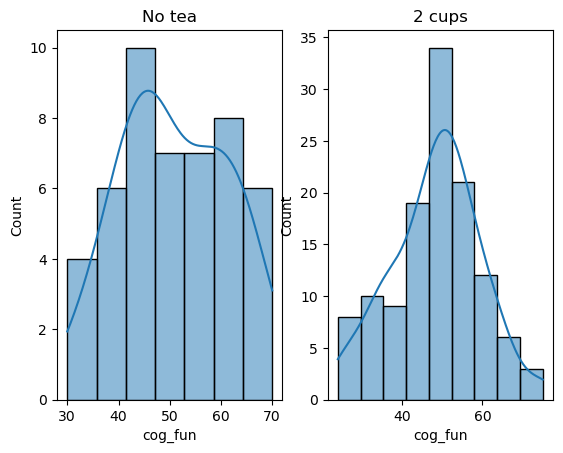

In [ ]:
#| echo: false
#| label: fig-hist-cog-fun
#| fig-cap: Histograms on cognitive function for 0-and 2-cup-tea drinker
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,2)
sns.histplot(tea_nocup['cog_fun'], kde=True, ax=ax[0])
sns.histplot(tea_2cups['cog_fun'], kde=True, ax=ax[1])
ax[0].set_title('No tea')
ax[1].set_title('2 cups')
plt.show()


In [25]:
#| echo: false
tea_nocup = tea_df.loc[tea_df['tea'] == 0]
tea_2cups = tea_df.loc[tea_df['tea'] == 2]

### Q2: Interpret the independent-samples $t$-test result. 

The Levene's Test resulted $F \approx 0.0797$ and a high $p \approx 0.7781$, indicated that there is no significant difference in variances between the groups, however, due to the unequal sample size, we may stick on the Welch’s $t$-test here. The result was shown as follows: 

In the independent-samples $t$-test comparing cognitive function scores between individuals who do not drink tea (Group 1) and those who drink two cups of tea per day (Group 2), the results indicated a $t(89.65) \approx 1.375$, $p \approx 0.1725$, two-tailed, which suggests that there is no statistically significant difference in cognitive function scores between the two groups at the conventional level of $ \alpha = 0.05$. The 95% confidence interval for the difference in means are $[-1.11, 6.09]$. The effect size, measured by Cohen's $d \approx 0.23$, reflecting a small effect. Additionally, the Bayes factor $BF_{10} \approx 0.432$ suggests that the evidence is more in favor of the null hypothesis than the alternative. Overall, these findings imply that drinking two cups of tea per day does not significantly impact cognitive function compared to non-tea drinkers within the context of this experiment.

In [13]:
#| echo: false
import scipy.stats as stats
tea_levene = stats.levene(tea_nocup['cog_fun'], tea_2cpus['cog_fun'])
print(f'Levene\'s Test for Equality of Variances: \nF: {tea_levene[0]}\nSig: {tea_levene[1]}')

Levene's Test for Equality of Variances: 
F: 0.07969429918151855
Sig: 0.7780595985739489


In [77]:
#| echo: false

import pingouin as pg
from IPython.display import Markdown
tea_ttest_result_welch = pg.ttest(tea_nocup['cog_fun'], tea_2cpus['cog_fun'], correction='auto')
tea_ttest_result_normal = pg.ttest(tea_nocup['cog_fun'], tea_2cpus['cog_fun'], correction=False)
tea_ttest_result = pd.concat([tea_ttest_result_welch, tea_ttest_result_normal])
tea_ttest_result.insert(0, 'Type', ['**Welch’s $t$-test applied**', 'Independent-samples $t$-test'])
Markdown(tea_ttest_result.to_markdown(index=False))

| Type                         |       T |      dof | alternative   |    p-val | CI95%         |   cohen-d |   BF10 |   power |
|:-----------------------------|--------:|---------:|:--------------|---------:|:--------------|----------:|-------:|--------:|
| **Welch’s $t$-test applied** | 1.37534 |  89.6494 | two-sided     | 0.172453 | [-1.11  6.09] |  0.229847 |  0.432 | 0.26855 |
| Independent-samples $t$-test | 1.34901 | 168      | two-sided     | 0.17915  | [-1.15  6.14] |  0.229847 |  0.418 | 0.26855 |

# Dataset 2: Download Music Festival

## Context
In Laboratory 1 we analyzed download.sav, which contains hygiene scores of concert goers over three days of a rock music festival. Now we hope to study the relationship between hygiene scores on days 2 and 3.

## Objectives
3. Is the correlation coefficient an appropriate measure of the relationship between hygiene scores on days 2 and 3? Why or why not?
4. Conduct a paired-samples 𝑡 test. Write a short paragraph that summarizes and interprets the results of the test.

## Solutions

You may still remember the *Ms. Laundry Pod the Outlier* in the story of Lab 1. The bad news is she's still in the provided dataset. While the good news is this typo only happens on `day_1` and we are interested in the hygiene scores for `day_2` and `day_3` this time, we may not need to "say goodbye" as we did in Lab 1.  

良かったね、ランドリーポッドさん。[^1]

**or should I say that?**

[^1]: Am I watching an anime? 

Since the assumption of paired sample $t$-test requires the same variable measured in the same units for the two situations, all participants without hygiene scores for either `day_2` or `day_3` should be dropped. The `pingouin` package will handle this automatically while doing the math. The new $N = 123$. 

さよなら、ランドリーポッドさん。


In [ ]:
#|echo: false
download_df_dropped_na = download_df.dropna()
Markdown(download_df_dropped_na.describe().reset_index().to_markdown(index=False))

| index   |   ticket_no |      day_1 |      day_2 |      day_3 |
|:--------|------------:|-----------:|-----------:|-----------:|
| count   |     123     | 123        | 123        | 123        |
| mean    |    3647.98  |   1.65146  |   0.92748  |   0.976504 |
| std     |     626.302 |   0.643897 |   0.666004 |   0.710277 |
| min     |    2111     |   0.43     |   0.05     |   0.02     |
| 25%     |    3274.5   |   1.16     |   0.425    |   0.44     |
| 50%     |    3649     |   1.55     |   0.78     |   0.76     |
| 75%     |    4183     |   2.095    |   1.215    |   1.525    |
| max     |    4724     |   3.38     |   3.44     |   3.41     |


### Q3: Is correlation coefficient appropriate

Recall back to the assumption of Pearson's $r$, the correlation coefficient is partially an appropriate measure to study the relationship between hygiene scores on days 2 and 3: 

1. Sample Size: the researcher tested all comers with an $N=123$, which ia is similar to the population of interest. 
2. Linear Relationship: The scatter plot on the relationship between hygiene scores on Day 2 and Day 3 (see @fig-scatter-download) shows a clear linear trend, indicating a positive linear relationship. This suggests that using a correlation coefficient to measure this relationship is appropriate.
3. Scale of Measurement: The hygiene scores are continuous variables, making the correlation coefficient suitable.
4. Outliers: There seems not appear to be any significant outliers that would severely distort the correlation. 

However: 
As for the normality: @fig-hist-hygiene suggests that both sets of scores are not normally distributed. 

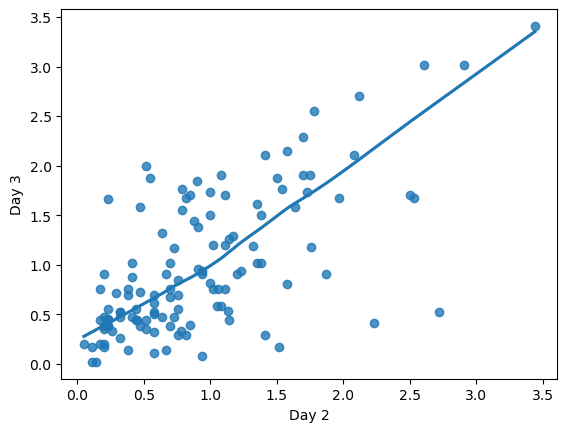

In [ ]:
#| echo: false
#| label: fig-scatter-download
#| fig-cap: Scatter-plot on hygiene scores between day 2 vs day 3
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=download_df_dropped_na, x='day_2', y='day_3', lowess=True)
plt.xlabel('Day 2')
plt.ylabel('Day 3')
plt.show()

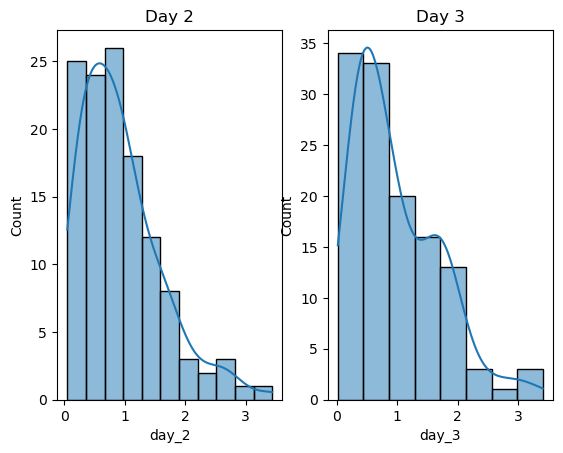

In [141]:
#| echo: false
#| label: fig-hist-hygiene
#| fig-cap: Histograms on Hygiene Scores of Day 2 vs Day 3
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,2)
sns.histplot(download_df_dropped_na['day_2'], kde=True, ax=ax[0])
sns.histplot(download_df_dropped_na['day_3'], kde=True, ax=ax[1])
ax[0].set_title('Day 2')
ax[1].set_title('Day 3')
plt.show()



### Q4: Interpret the paired-sample $t$-test result


A paired sample $t$-test was conducted to compare the hygiene scores between days 2 and 3 of the Download Music Festival. The test yielded $t(122) \approx -0.9685$, $ p \approx 0.335 $. This indicates that there is no statistically significant difference in hygiene scores between the two days. The 95% CI for the mean difference is $[-0.15, 0.05]$, suggesting that any difference is likely small and not meaningful. The effect size, as measured by Cohen's $d \approx 0.0712$, indicating a negligible effect. The Bayes Factor $BF_{10} \approx 0.158$ suggests that the data provide more support for the null hypothesis than the alternative. Overall, the results suggest no substantial change in hygiene scores from day 2 to day 3 [^2]. 

[^2]: That's definitely true for a music festival full of sweat, alcohol, *Seishun (青春, that's youth in Japanese)* and romance! Only problem for these activities is they are too "リア充", it's a shame the bands there never appears to play Anisongs. There's no random *Togenashi Togeari* (トゲナシトゲアリ) appear on the stage of summer music festival, at least you can't count this happen in Greater China. <br> If you can't figure out what I am saying, skip it TTATT. 

In [100]:
#| echo: false
download_ttest_result = pg.ttest(download_df_dropped_na['day_2'], download_df_dropped_na['day_3'] , paired=True)
Markdown(download_ttest_result.to_markdown(index=False))

|         T |   dof | alternative   |    p-val | CI95%         |   cohen-d |   BF10 |    power |
|----------:|------:|:--------------|---------:|:--------------|----------:|-------:|---------:|
| -0.968472 |   122 | two-sided     | 0.334725 | [-0.15  0.05] |  0.071205 |  0.158 | 0.122744 |